In [2]:
import os
from PIL import Image
import pyocr
import pyocr.builders
import requests
import io
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
path_tesseract = "C:\\Program Files\\Tesseract-OCR"
if path_tesseract not in os.environ["PATH"].split(os.pathsep):
    os.environ["PATH"] += os.pathsep + path_tesseract

tools = pyocr.get_available_tools()
tool = tools[0]

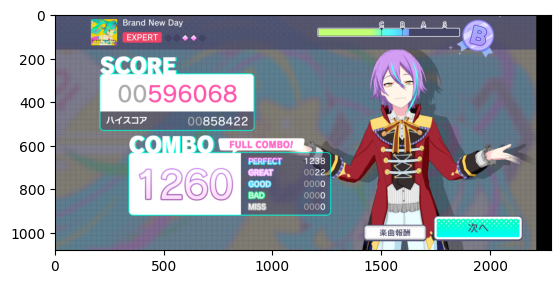

In [4]:
img = Image.open('../targets/wide.png')
img = img.convert('RGB')
size = img.size

plt.imshow(img)

In [6]:
builder = pyocr.builders.WordBoxBuilder (tesseract_layout=11)
result = tool.image_to_string(img, lang="eng", builder=builder)

In [7]:
img2 = np.array(img)

for box in result:
    cv2.rectangle(img2, box.position[0], box.position[1], (0, 0, 255), 2)
    print("word: {}, pos: {}".format(box.content, box.position))

word: >|, pos: ((233, 25), (284, 58))
word: Brand, pos: ((313, 20), (413, 49))
word: New, pos: ((431, 20), (505, 49))
word: Day, pos: ((521, 20), (586, 56))
word: [tC, pos: ((1209, 64), (1624, 95))
word: o¢, pos: ((584, 92), (650, 120))
word: |=, pos: ((1579, 256), (1618, 280))
word: }, pos: ((1667, 267), (1675, 306))
word: Ii, pos: ((1473, 343), (1489, 358))
word: NTAIP, pos: ((236, 467), (421, 502))
word: 2, pos: ((1548, 464), (1553, 493))
word: by, pos: ((1603, 466), (1626, 487))
word: 00858422, pos: ((611, 467), (884, 508))
word: PA, pos: ((1665, 565), (1682, 583))
word: Me, pos: ((1503, 571), (1533, 594))
word: vi, pos: ((442, 574), (520, 630))
word: 1238, pos: ((1147, 655), (1239, 685))
word: 0022, pos: ((1144, 708), (1239, 737))
word: Kor, pos: ((1507, 636), (1683, 751))
word: (, pos: ((1868, 644), (1933, 741))
word: 0000, pos: ((1144, 761), (1239, 790))
word: UW, pos: ((410, 816), (443, 859))
word: (=>, pos: ((485, 811), (588, 860))
word: a4, pos: ((609, 822), (698, 852))
word:

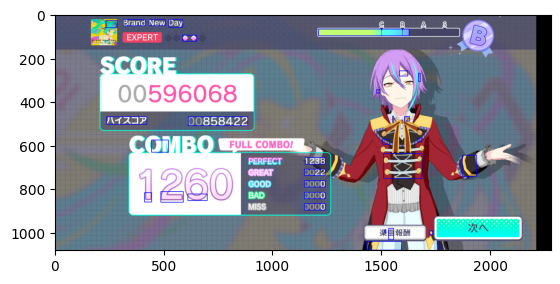

In [8]:
plt.imshow(img2)